In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense, Input, Conv2D, MaxPooling2D

In [2]:
import os

In [3]:
os.listdir('./Modified_Dataset')

['Classroom',
 'Games',
 'Movies',
 'Screen Shot Programming',
 'Youtube Entertainment']

In [4]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

In [5]:
train_datagen = datagen.flow_from_directory(
    './Modified_Dataset',
    target_size = (256, 256),
    subset = 'training'
)

test_datagen = datagen.flow_from_directory(
    './Modified_Dataset',
    target_size = (256, 256),
    subset='validation'
)

Found 356 images belonging to 5 classes.
Found 87 images belonging to 5 classes.


In [6]:
print(test_datagen.class_indices)

{'Classroom': 0, 'Games': 1, 'Movies': 2, 'Screen Shot Programming': 3, 'Youtube Entertainment': 4}


In [7]:
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')
])

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint('ssmodel', 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [10]:
model.fit(train_datagen, validation_data=test_datagen, epochs=10, callbacks=[model_checkpoint])

Epoch 1/10
12/12 [==============================] - ETA: 0s - loss: 1.6860 - accuracy: 0.3034
Epoch 1: val_accuracy improved from -inf to 0.43678, saving model to ssmodel


INFO:tensorflow:Assets written to: ssmodel\assets


INFO:tensorflow:Assets written to: ssmodel\assets


12/12 [==============================] - 57s 3s/step - loss: 1.6860 - accuracy: 0.3034 - val_loss: 1.4099 - val_accuracy: 0.4368
Epoch 2/10
12/12 [==============================] - ETA: 0s - loss: 0.9740 - accuracy: 0.5534
Epoch 2: val_accuracy improved from 0.43678 to 0.71264, saving model to ssmodel


INFO:tensorflow:Assets written to: ssmodel\assets


INFO:tensorflow:Assets written to: ssmodel\assets


12/12 [==============================] - 27s 2s/step - loss: 0.9740 - accuracy: 0.5534 - val_loss: 0.8954 - val_accuracy: 0.7126
Epoch 3/10
12/12 [==============================] - ETA: 0s - loss: 0.7733 - accuracy: 0.7219
Epoch 3: val_accuracy improved from 0.71264 to 0.80460, saving model to ssmodel


INFO:tensorflow:Assets written to: ssmodel\assets


INFO:tensorflow:Assets written to: ssmodel\assets


12/12 [==============================] - 27s 2s/step - loss: 0.7733 - accuracy: 0.7219 - val_loss: 0.7133 - val_accuracy: 0.8046
Epoch 4/10
12/12 [==============================] - ETA: 0s - loss: 0.4646 - accuracy: 0.8511
Epoch 4: val_accuracy improved from 0.80460 to 0.85057, saving model to ssmodel


INFO:tensorflow:Assets written to: ssmodel\assets


INFO:tensorflow:Assets written to: ssmodel\assets


12/12 [==============================] - 26s 2s/step - loss: 0.4646 - accuracy: 0.8511 - val_loss: 0.4339 - val_accuracy: 0.8506
Epoch 5/10
12/12 [==============================] - ETA: 0s - loss: 0.4185 - accuracy: 0.8371
Epoch 5: val_accuracy improved from 0.85057 to 0.87356, saving model to ssmodel


INFO:tensorflow:Assets written to: ssmodel\assets


INFO:tensorflow:Assets written to: ssmodel\assets


12/12 [==============================] - 26s 2s/step - loss: 0.4185 - accuracy: 0.8371 - val_loss: 0.4311 - val_accuracy: 0.8736
Epoch 6/10
12/12 [==============================] - ETA: 0s - loss: 0.3026 - accuracy: 0.8904
Epoch 6: val_accuracy improved from 0.87356 to 0.90805, saving model to ssmodel


INFO:tensorflow:Assets written to: ssmodel\assets


INFO:tensorflow:Assets written to: ssmodel\assets


12/12 [==============================] - 25s 2s/step - loss: 0.3026 - accuracy: 0.8904 - val_loss: 0.4191 - val_accuracy: 0.9080
Epoch 7/10
12/12 [==============================] - ETA: 0s - loss: 0.2686 - accuracy: 0.9101
Epoch 7: val_accuracy did not improve from 0.90805
12/12 [==============================] - 24s 2s/step - loss: 0.2686 - accuracy: 0.9101 - val_loss: 0.4111 - val_accuracy: 0.8851
Epoch 8/10
12/12 [==============================] - ETA: 0s - loss: 0.2380 - accuracy: 0.9185
Epoch 8: val_accuracy did not improve from 0.90805
12/12 [==============================] - 23s 2s/step - loss: 0.2380 - accuracy: 0.9185 - val_loss: 0.6016 - val_accuracy: 0.8621
Epoch 9/10
12/12 [==============================] - ETA: 0s - loss: 0.5468 - accuracy: 0.7781
Epoch 9: val_accuracy did not improve from 0.90805
12/12 [==============================] - 24s 2s/step - loss: 0.5468 - accuracy: 0.7781 - val_loss: 0.6238 - val_accuracy: 0.7931
Epoch 10/10
12/12 [==============================

In [11]:
model.evaluate(test_datagen)

3/3 [==============================] - 5s 1s/step - loss: 0.6717 - accuracy: 0.7931


[0.6716724038124084, 0.7931034564971924]

3/3 [==============================] - 5s 1s/step


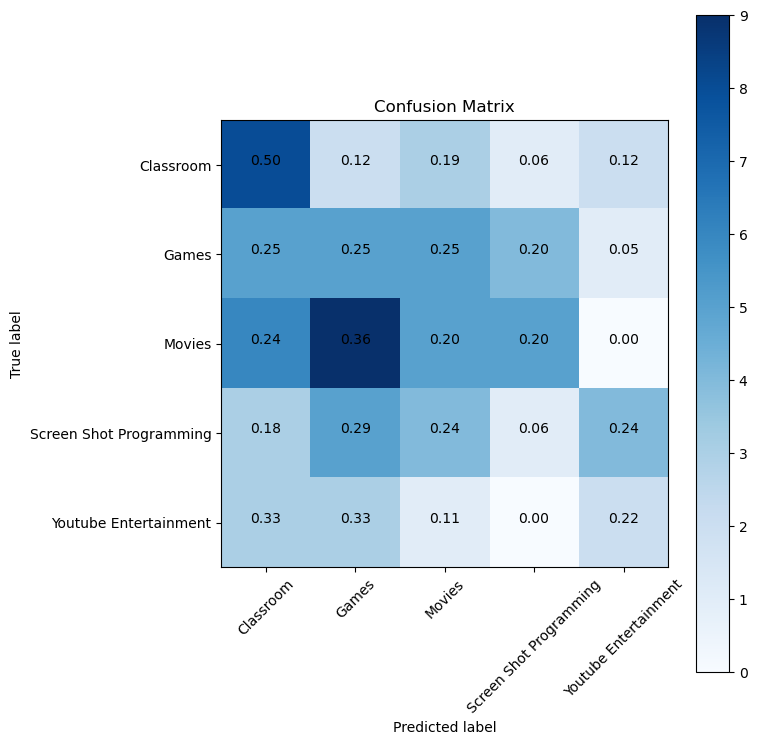

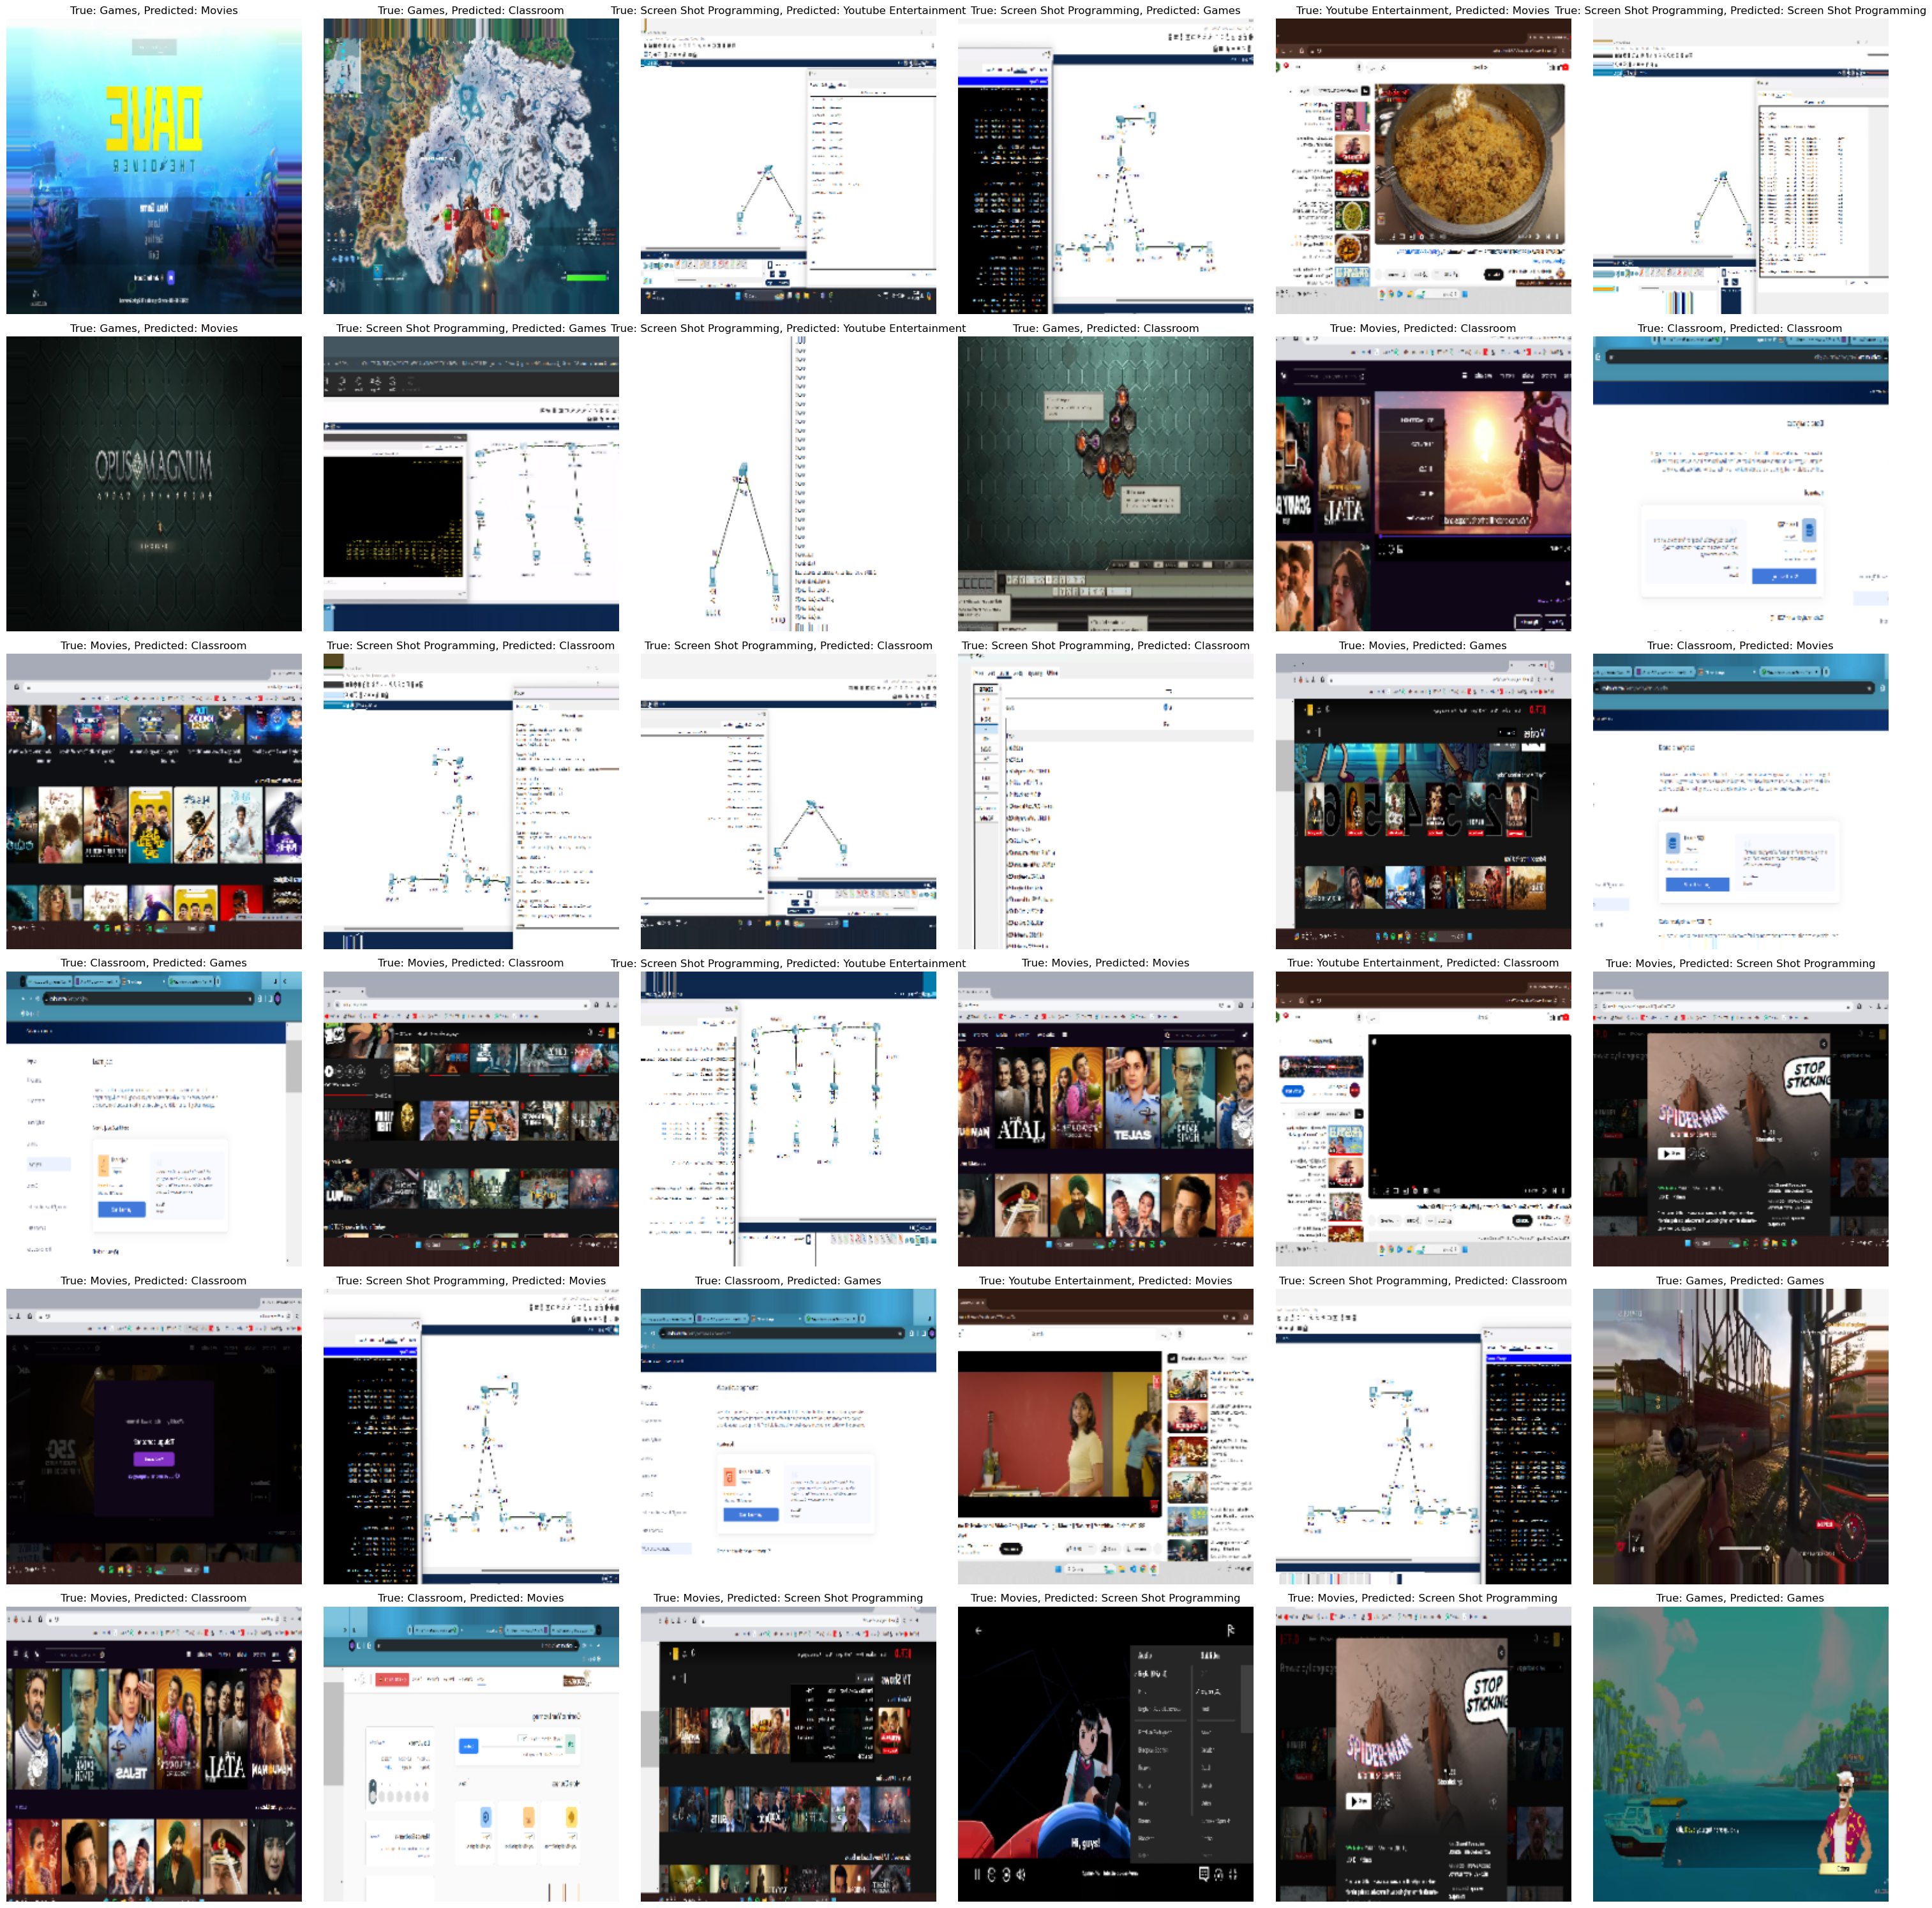

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

# Make predictions on the test dataset
predictions = model.predict(test_datagen)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_datagen.classes

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class names
class_names = list(test_datagen.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Display the normalized confusion matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm_normalized[i, j], '.2f'),
             horizontalalignment="center",
             color="white" if cm_normalized[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
num_images = 36
# Display sample images with predictions
plt.figure(figsize=(30, 30))
for i in range(num_images):
    image, labels = next(test_datagen)  # Retrieve images and labels from the generator
    label = labels[0]
    plt.subplot(6, 6, i + 1)  # Adjust the subplot layout as per your preference
    plt.imshow(image[0])  # Select the first image from the batch
    plt.axis('off')
    plt.title(f'True: {class_names[np.argmax(label)]}, Predicted: {class_names[predicted_labels[i]]}')

plt.tight_layout()
plt.show()
